In this assignment we are going to predict emplyee attition using k-nn prediction model

In [19]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

In [20]:
df = pd.read_csv('attrition.csv')
df = df.dropna() #first get rid of rows with empty cells
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Let's see how different variables relate with each other 

In [21]:
cat_columns = []
for column in df.columns:
    if df[column].dtype == 'object' and len(df[column].unique()) <=40:
        cat_columns.append(column)
    
print(cat_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [22]:
def create_barplot(df, column):
    f, axe = plt.subplots(figsize=(7,3))
    sns.countplot(x = df[column], hue=df['Attrition'], data=df)
    axe.set(xlabel = column, ylabel = 'Count')

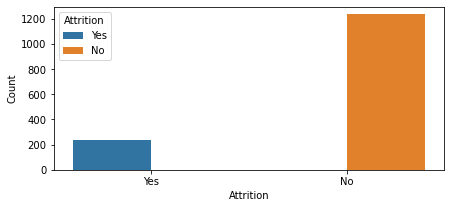

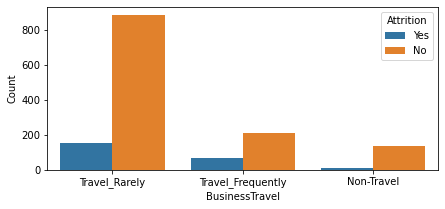

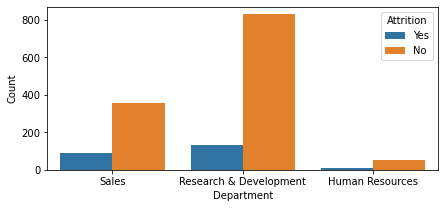

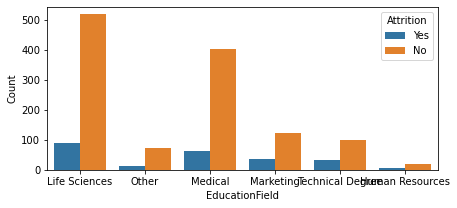

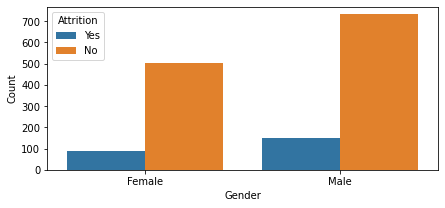

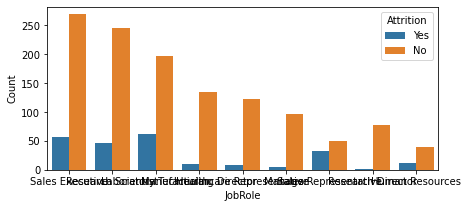

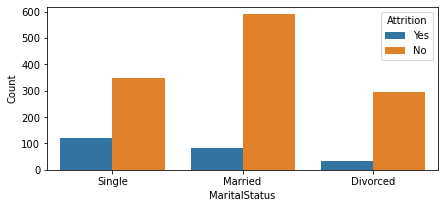

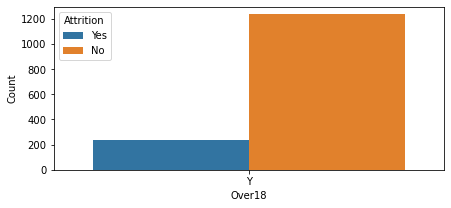

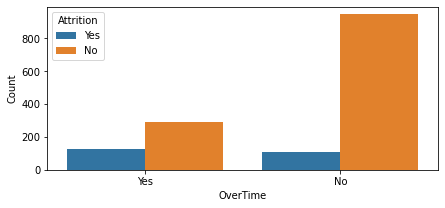

In [23]:
for column in cat_columns:
    create_barplot(df, column)

To proceed with predicting I have chosen RelationshipSatisfaction, YearsSinceLastPromotion, WorkLifeBalance as the most related variables

In [28]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['RelationshipSatisfaction', 'YearsSinceLastPromotion', 'WorkLifeBalance']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['Attrition'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [29]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8231292517006803

82% of employee attritions were predicted accurately which (in my opinion is really good). Previouslt I tried predicting including TotalWorkingYears instead of RelationshipSatisfaction which resulted in 81% of accurate preditions 

Let's look at the confusion matrix to see how well the model tells apart the attritions. A confusion matrix gives a the different options and the number of predictions for each combination.

In [30]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[363,   1],
       [ 77,   0]], dtype=int64)

In [31]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['Yes', 'No'], columns = ['Yes_p', 'No_p']) 
conf_matrix

,Yes_p,No_p
Yes,363,1
No,77,0


The way to read this is that of the attrition, 363 are correctly predicted as 'Yes', 1 is instead predicted as 'No' and. The recall and precision for the category drama is:

𝑟𝑒𝑐𝑎𝑙𝑙=363/(363+1)= 0.99

𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛=363/(363+77)= 0.83

We might improve our scores by trying out different values of k.